In [55]:
import gzip
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.layers.advanced_activations import LeakyReLU
def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc



In [56]:
path = 'flatland_train.data'
X, y = pickle.load(gzip.open(path, 'rb'))
y[y != 0] -= 2
X = X / 255.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(-1, 50,50, 1)
X_test = X_test.reshape(-1, 50, 50, 1)

  

In [58]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [59]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[85])
print('After conversion to one-hot:', y_train_one_hot[85])

Original label: 0.0
After conversion to one-hot: [1. 0. 0. 0. 0.]


In [60]:
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)

In [ ]:
#
#model = keras.models.Sequential()
#model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 1)))
#model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(10, activation="softmax"))
#model.compile(loss="sparse_categorical_crossentropy",
 #             optimizer="sgd",
#              metrics=["accuracy"])
#model.summary()
#




In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(50, 50, 1),padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.MaxPooling2D((2, 2),padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.LeakyReLU(alpha=0.1))                  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.LeakyReLU(alpha=0.1))                  
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

In [80]:
loss = model.fit(X_train, y_train, epochs =25, validation_split=0.2)

Epoch 1/25
200/200 [==============================] - 3s 16ms/step - loss: 0.3020 - accuracy: 0.9070 - val_loss: 0.4394 - val_accuracy: 0.8587
Epoch 2/25
200/200 [==============================] - 3s 15ms/step - loss: 0.2662 - accuracy: 0.9198 - val_loss: 0.2979 - val_accuracy: 0.9237
Epoch 3/25
200/200 [==============================] - 3s 15ms/step - loss: 0.2303 - accuracy: 0.9356 - val_loss: 0.3003 - val_accuracy: 0.9156
Epoch 4/25
200/200 [==============================] - 3s 15ms/step - loss: 0.2013 - accuracy: 0.9466 - val_loss: 0.3047 - val_accuracy: 0.9225
Epoch 5/25
200/200 [==============================] - 3s 15ms/step - loss: 0.1901 - accuracy: 0.9491 - val_loss: 0.2734 - val_accuracy: 0.9381
Epoch 6/25
200/200 [==============================] - 3s 15ms/step - loss: 0.1664 - accuracy: 0.9575 - val_loss: 0.2964 - val_accuracy: 0.9281
Epoch 7/25
200/200 [==============================] - 3s 15ms/step - loss: 0.1543 - accuracy: 0.9583 - val_loss: 0.2849 - val_accuracy: 0.9344

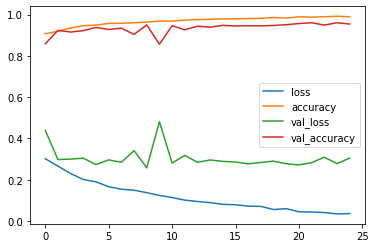

In [81]:
pd.DataFrame(loss.history).plot()


In [82]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

63/63 - 0s - loss: 0.3449 - accuracy: 0.9480 - 405ms/epoch - 6ms/step
0.9480000138282776


In [85]:
model.save('model.h5')

In [84]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.978